In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Read in raw water chemistry data and clean data by selecting needed columns

In [3]:
filename='../data/Water Data/BOLES_H2O_RAW_DATA.xlsx'
chem_data_df=pd.read_excel(filename)
chem_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NPSTORET Org ID/Code            12446 non-null  object        
 1   Organization Name               12446 non-null  object        
 2   ProjectID                       12446 non-null  object        
 3   Project Name                    12446 non-null  object        
 4   StationID                       12446 non-null  object        
 5   Station Name                    12446 non-null  object        
 6   Station Latitude                12446 non-null  float64       
 7   Station Longitude               12446 non-null  float64       
 8   Visit Start Date                12446 non-null  datetime64[ns]
 9   Visit Primary Key               12446 non-null  int64         
 10  Visit Last Update Date          12446 non-null  datetime64[ns]
 11  Vi

In [4]:
chem_data_df['Visit Source Org ID'].unique()

array([nan])

In [5]:
chem_data_clean_df=chem_data_df[['NPSTORET Org ID/Code','StationID','Station Name','Station Latitude','Station Longitude','Visit Start Date',
                                'Visit Primary Key','Activity/Sample ID','Activity Start Date','Local Characteristic Name','Parameter Name',
                                'Analytical Procedure ID','Units','Result Value/Text','Detection Condition','Detection Limit','Result Comment']]
chem_data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   NPSTORET Org ID/Code       12446 non-null  object        
 1   StationID                  12446 non-null  object        
 2   Station Name               12446 non-null  object        
 3   Station Latitude           12446 non-null  float64       
 4   Station Longitude          12446 non-null  float64       
 5   Visit Start Date           12446 non-null  datetime64[ns]
 6   Visit Primary Key          12446 non-null  int64         
 7   Activity/Sample ID         12446 non-null  object        
 8   Activity Start Date        12446 non-null  datetime64[ns]
 9   Local Characteristic Name  12446 non-null  object        
 10  Parameter Name             12446 non-null  object        
 11  Analytical Procedure ID    12446 non-null  object        
 12  Unit

In [6]:
chem_data_clean_df

,NPSTORET Org ID/Code,StationID,Station Name,Station Latitude,Station Longitude,Visit Start Date,Visit Primary Key,Activity/Sample ID,Activity Start Date,Local Characteristic Name,Parameter Name,Analytical Procedure ID,Units,Result Value/Text,Detection Condition,Detection Limit,Result Comment
0,GRSM,GRSM_F_0114,Cosby Creek at Log Bridge,35.747944,-83.200304,1993-10-15,10,GRSM_F_0114_19931015_29,1993-10-15,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,49,Detected and Quantified,NaN,NaN
1,GRSM,GRSM_F_0114,Cosby Creek at Log Bridge,35.747944,-83.200304,1993-10-15,10,GRSM_F_0114_19931015_29,1993-10-15,Lab Conductivity_Titrator,Specific conductance,120.1,µS/cm,21.3,Detected and Quantified,NaN,NaN
2,GRSM,GRSM_F_0114,Cosby Creek at Log Bridge,35.747944,-83.200304,1993-10-15,10,GRSM_F_0114_19931015_29,1993-10-15,Lab NH4_IC,"Nitrogen, ammonium (NH4) as NH4",GRSM_NH4,µeq/L,*Non-detect,*Non-detect,0.330,Reported Value: 0.
3,GRSM,GRSM_F_0114,Cosby Creek at Log Bridge,35.747944,-83.200304,1993-10-15,10,GRSM_F_0114_19931015_29,1993-10-15,Lab Nitrate_IC,"Nitrogen, Nitrate (NO3) as NO3",4110-B,µeq/L,39.06,Detected and Quantified,1.090,NaN
4,GRSM,GRSM_F_0114,Cosby Creek at Log Bridge,35.747944,-83.200304,1993-10-15,10,GRSM_F_0114_19931015_29,1993-10-15,Lab pH_Titrator,pH,150.1,NaN,6.43,Detected and Quantified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12441,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2024-11-16,16539,GRSM_F_INC1.5_20241116_S24254,2024-11-16,Lab NH4_IC,"Nitrogen, ammonium (NH4) as NH4",GRSM_NH4,µeq/L,*Non-detect,*Non-detect,0.388,NaN
12442,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2024-11-16,16539,GRSM_F_INC1.5_20241116_S24254,2024-11-16,Lab Nitrate_IC,"Nitrogen, Nitrate (NO3) as NO3",4110-B,µeq/L,*Non-detect,*Non-detect,0.661,NaN
12443,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2024-11-16,16539,GRSM_F_INC1.5_20241116_S24254,2024-11-16,Lab pH_Titrator,pH,150.1,NaN,6.5337,Detected and Quantified,NaN,NaN
12444,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2024-11-16,16539,GRSM_F_INC1.5_20241116_S24254,2024-11-16,Lab Sulfate_IC,"Sulfur, sulfate (SO4) as SO4",4110-B,µeq/L,12.48319,Detected and Quantified,1.062,NaN


## Filter df for ANC data only

In [8]:
chem_data_clean_df['Parameter Name'].unique()

array(['Acid Neutralizing Capacity (ANC)', 'Specific conductance',
       'Nitrogen, ammonium (NH4) as NH4',
       'Nitrogen, Nitrate (NO3) as NO3', 'pH',
       'Sulfur, sulfate (SO4) as SO4', 'Aluminum', 'Copper', 'Manganese',
       'Zinc'], dtype=object)

In [9]:
anc_df=chem_data_clean_df[chem_data_clean_df['Parameter Name']=='Acid Neutralizing Capacity (ANC)']
anc_df['Result Value/Text']=anc_df['Result Value/Text'].astype(float)
anc_df['Year']=anc_df['Visit Start Date'].dt.year
anc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1465 entries, 0 to 12437
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   NPSTORET Org ID/Code       1465 non-null   object        
 1   StationID                  1465 non-null   object        
 2   Station Name               1465 non-null   object        
 3   Station Latitude           1465 non-null   float64       
 4   Station Longitude          1465 non-null   float64       
 5   Visit Start Date           1465 non-null   datetime64[ns]
 6   Visit Primary Key          1465 non-null   int64         
 7   Activity/Sample ID         1465 non-null   object        
 8   Activity Start Date        1465 non-null   datetime64[ns]
 9   Local Characteristic Name  1465 non-null   object        
 10  Parameter Name             1465 non-null   object        
 11  Analytical Procedure ID    1465 non-null   object        
 12  Units     

C:\Users\thisi\AppData\Local\Temp\ipykernel_35640\4038499261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anc_df['Result Value/Text']=anc_df['Result Value/Text'].astype(float)
C:\Users\thisi\AppData\Local\Temp\ipykernel_35640\4038499261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anc_df['Year']=anc_df['Visit Start Date'].dt.year


## Filter for ANC data at Cosby Creek at Log Bridge

In [11]:
anc_at_cosby_creek_df=anc_df[anc_df['StationID']=='GRSM_F_0114']
anc_at_cosby_creek_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 12357
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   NPSTORET Org ID/Code       157 non-null    object        
 1   StationID                  157 non-null    object        
 2   Station Name               157 non-null    object        
 3   Station Latitude           157 non-null    float64       
 4   Station Longitude          157 non-null    float64       
 5   Visit Start Date           157 non-null    datetime64[ns]
 6   Visit Primary Key          157 non-null    int64         
 7   Activity/Sample ID         157 non-null    object        
 8   Activity Start Date        157 non-null    datetime64[ns]
 9   Local Characteristic Name  157 non-null    object        
 10  Parameter Name             157 non-null    object        
 11  Analytical Procedure ID    157 non-null    object        
 12  Units      

<Axes: xlabel='Visit Start Date', ylabel='Result Value/Text'>

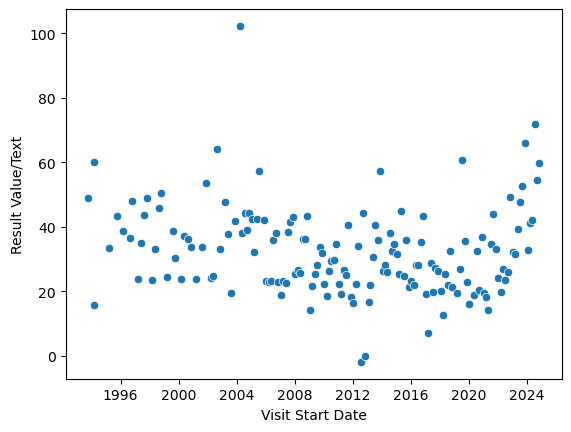

In [12]:
sns.scatterplot(x=anc_at_cosby_creek_df['Visit Start Date'],y=anc_at_cosby_creek_df['Result Value/Text'].astype(float))

In [66]:
filename='../data/Fish Data/BOLES_COS-2_Specimens.xlsx'
fish_data_cosby_creek_df=pd.read_excel(filename)
fish_data_cosby_creek_df.info()

#initialize the all_fish_df
#all_fish_df=fish_data_cosby_creek_df
#global all_fish_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Data_ID         2275 non-null   int64  
 1   Event_ID        2275 non-null   int64  
 2   Location_ID     2275 non-null   object 
 3   StreamName      2275 non-null   object 
 4   StreamCode      2275 non-null   object 
 5   Event_Date      0 non-null      float64
 6   ObsYear         2275 non-null   int64  
 7   Run_Number      2275 non-null   int64  
 8   Species_Code    2275 non-null   object 
 9   Species_Name    2275 non-null   object 
 10  TotalLength_mm  2275 non-null   int64  
 11  Weight_g        2275 non-null   float64
 12  Tag             0 non-null      float64
 13  Scale           0 non-null      float64
 14  Notes           49 non-null     object 
 15  Fulton_K        2275 non-null   float64
 16  Edit_Notes      5 non-null      object 
dtypes: float64(5), int64(5), object(7

[Text(0.5, 1.0, 'Trout Condition for Cosby Creek by Year')]

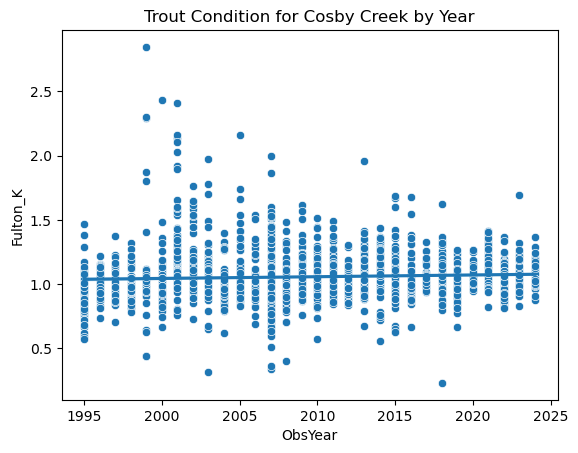

In [68]:
ax=sns.scatterplot(x=fish_data_cosby_creek_df['ObsYear'],y=fish_data_cosby_creek_df['Fulton_K'])
sns.regplot(x=fish_data_cosby_creek_df['ObsYear'],y=fish_data_cosby_creek_df['Fulton_K'], scatter=False, ax=ax).set(title='Trout Condition for Cosby Creek by Year')

## Create graphs for the remaining 15 sites with fish data

In [71]:
sites={'../data/Fish Data/BOLES_BeechFlats_Specimen.xlsx':'fish_data_beech_flats_df',
      '../data/Fish Data/BOLES_BunchesCreek_Specimen.xlsx':'fish_data_bunches_creek_df',
      '../data/Fish Data/BOLES_CannonCk_Specimen.xlsx':'fish_data_cannon_creek_df',
      '../data/Fish Data/BOLES_DeepCk_Specimen.xlsx':'fish_data_deep_creek_df',
      '../data/Fish Data/BOLES_GoshenProng_Specimen_GOS3.xlsx':'fish_data_goshen_prong_GOS3_df',
      '../data/Fish Data/BOLES_GoshenProng_Specimen_GOS4.xlsx':'fish_data_goshen_prong__GOS4_df',
      '../data/Fish Data/BOLES_HazelCreek_Specimen_HAZ3N.xlsx':'fish_data_hazel_creek_HAZ3N_df',
      '../data/Fish Data/BOLES_HazelCreek_Specimen_HAZ4.xlsx':'fish_data_hazel_creek_HAZ4_df',
      '../data/Fish Data/BOLES_IndianCamp_Specimen_ICC1.xlsx':'fish_indian_camp_ICC1_df',
      '../data/Fish Data/BOLES_IndianCamp_Specimen_ICC3N.xlsx':'fish_indian_camp_ICC3N_df',
      '../data/Fish Data/BOLES_IndianCk_Specimen.xlsx':'fish_indian_creek_df',
      '../data/Fish Data/BOLES_KanatiFork_Specimen.xlsx':'fish_data_kanati_fork_df',
      '../data/Fish Data/BOLES_OnionBed_Specimen.xlsx':'fish_data_onion_bed_df',
      '../data/Fish Data/BOLES_PrettyHollow_Specimen.xlsx':'fish_data_pretty_hollow_df',
      '../data/Fish Data/BOLES_RoadProng_Specimen.xlsx':'fish_data_road_prong_df',
      '../data/Fish Data/BOLES_RockCk_Specimen.xlsx':'fish_data_rock_creek_df',
      '../data/Fish Data/BOLES_WalkerCamp_Specimen_WCP1.xlsx':'fish_data_walker_camp_WCP1_df',
      '../data/Fish Data/BOLES_WalkerCamp_Specimen_WCP2.xlsx':'fish_data_walker_camp_WCP2_df'}

In [73]:
titles=['Trout Condition for Beech Flats at BEF-2 by Year',
        'Trout Condition for Bunches Creek at BUN-2 by Year',
        'Trout Condition for Cannon Creek at CAN-1 by Year',
        'Trout Condition for Deep Creek at DPC-3 by Year',
        'Trout Condition for Goshen Prong at GOS-3 by Year',
        'Trout Condition for Goshen Prong at GOS-4 by Year',
        'Trout Condition for Hazel Creek at HAZ-3N by Year',
        'Trout Condition for Hazel Creek at HAZ-4 by Year',
        'Trout Condition for Indian Camp at ICC-1 by Year',
        'Trout Condition for Indian Camp at ICC-3N by Year',
        'Trout Condition for Indian Creek by Year',
        'Trout Condition for Kanati Fork by Year',
        'Trout Condition for Onion Bed by Year',
        'Trout Condition for Pretty Hollow by Year',
        'Trout Condition for Road Prong by Year',
        'Trout Condition for Rock Creek by Year',
        'Trout Condition for Walker Camp at WCP-1 by Year',
        'Trout Condition for Walker Camp at WCP-2 by Year']

In [75]:
def trout_condition_graph(file_name, df_name,i):
    df_name=pd.read_excel(file_name)
    ax=sns.scatterplot(x=df_name['ObsYear'],y=df_name['Fulton_K'])
    sns.regplot(x=df_name['ObsYear'],y=df_name['Fulton_K'], scatter=False, ax=ax).set(title=titles[i])
    plt.show()

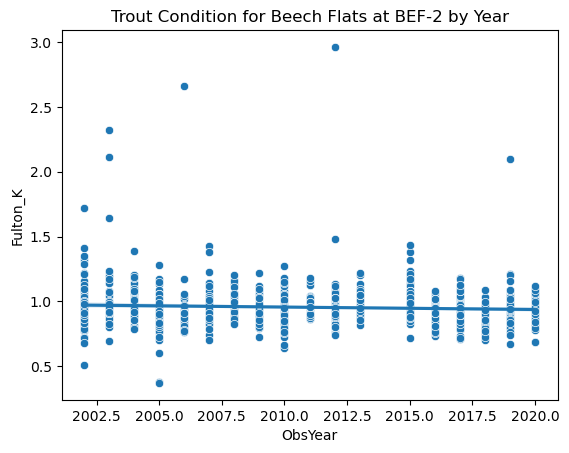

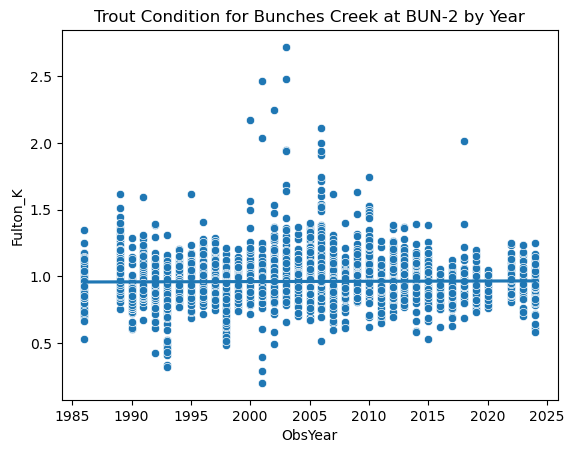

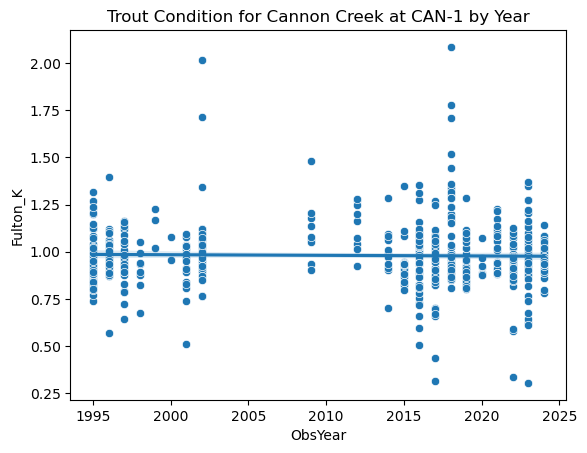

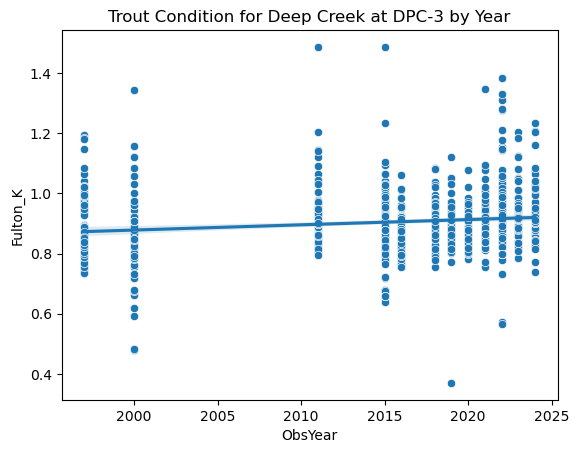

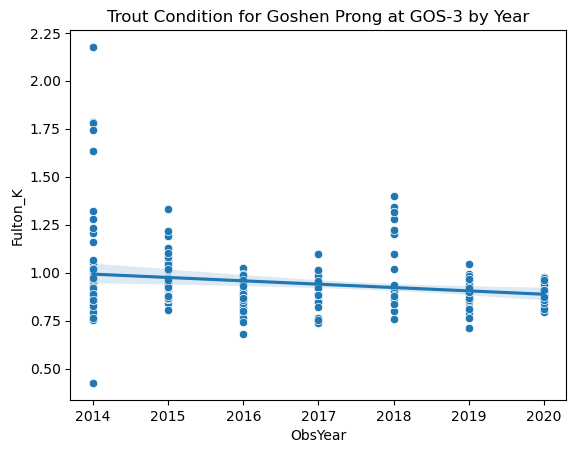

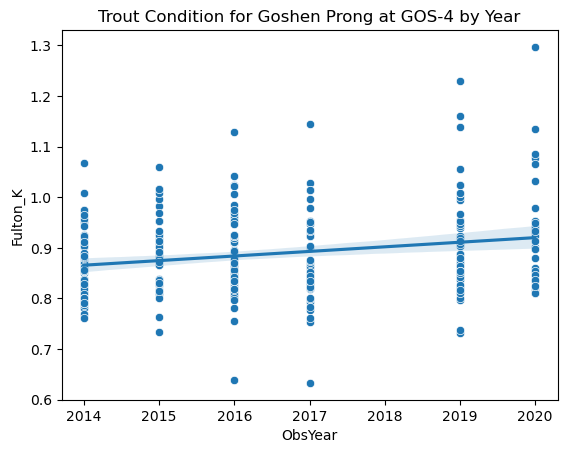

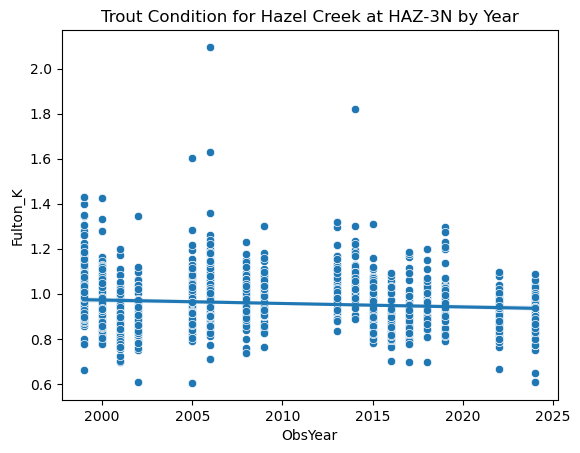

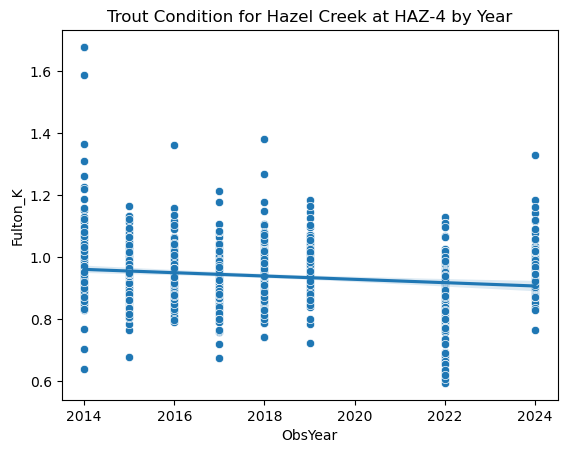

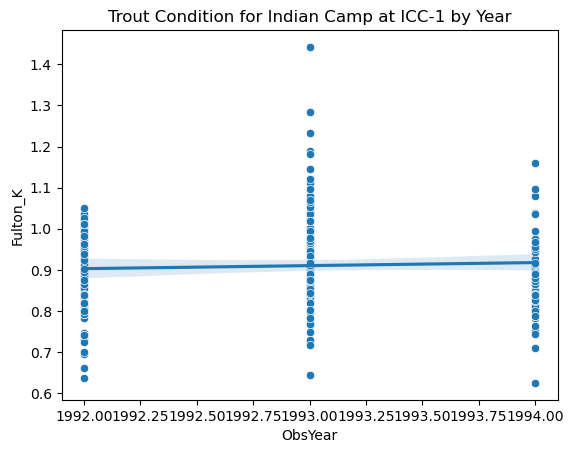

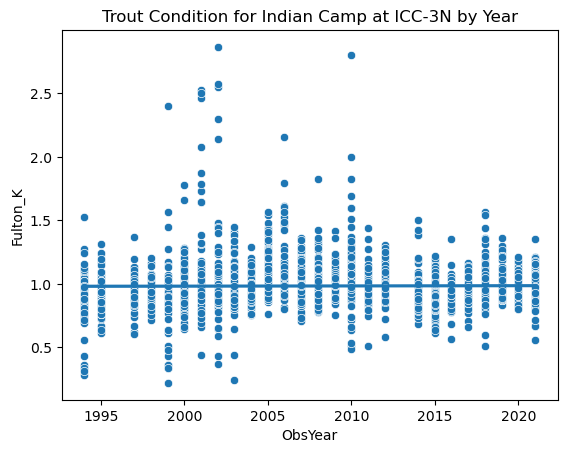

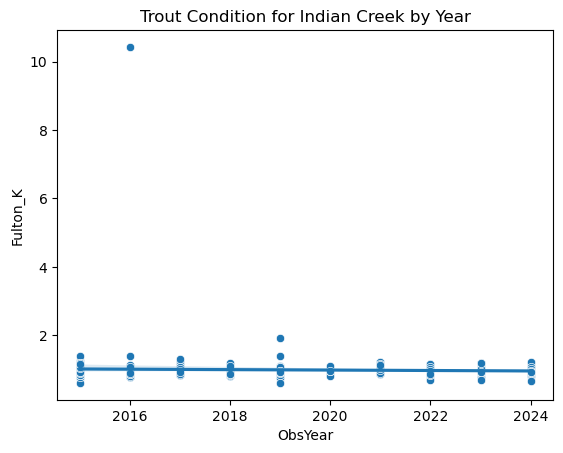

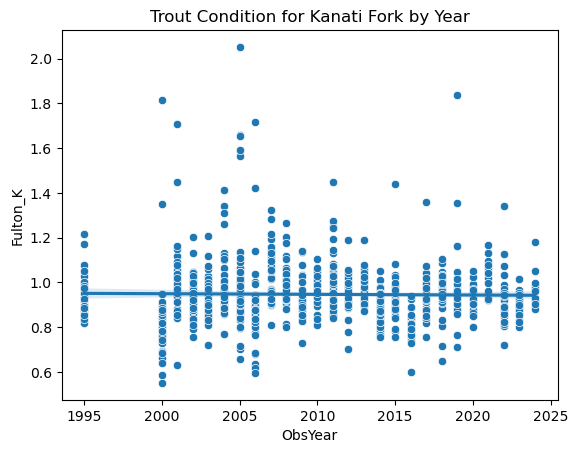

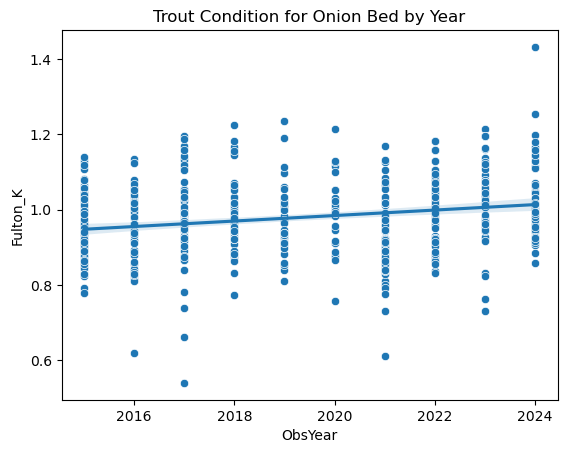

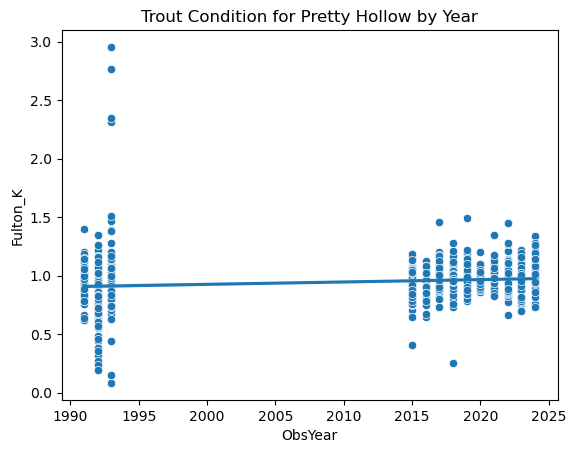

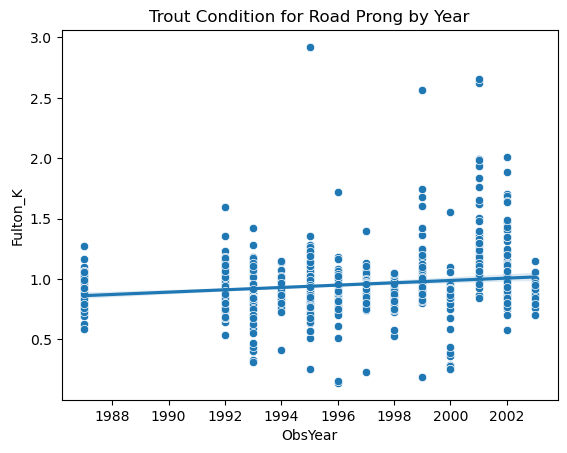

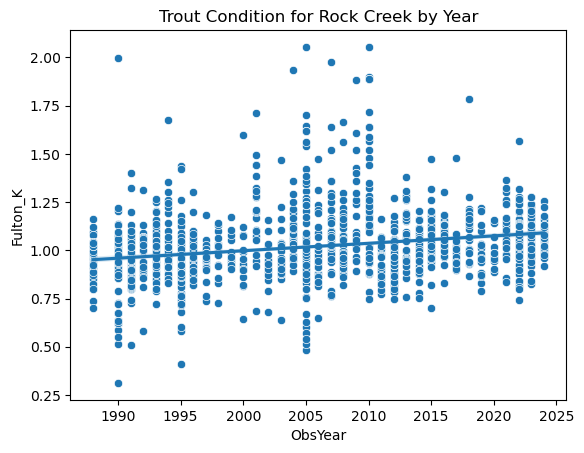

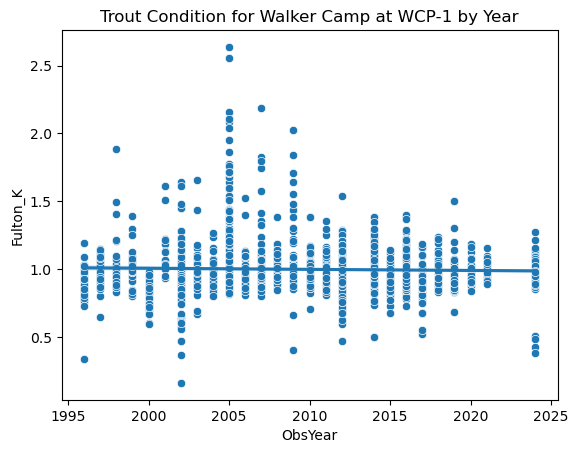

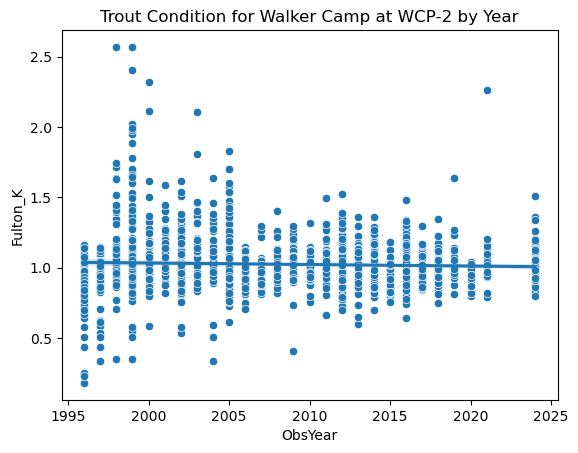

In [77]:
i=0
for key,value in sites.items():
    trout_condition_graph(key,value,i)
    i+=1
    
    #https://www.geeksforgeeks.org/how-can-i-show-figures-separately-in-matplotlib/

In [78]:
anc_df['Station Name'].unique()

array(['Cosby Creek at Log Bridge', 'Goshen Prong Above Fish Camp Prong',
       'Hazel Creek Above Cascades', 'Walker Camp Prong at Last Bridge',
       'Beech Flats Above US 441 Loop', 'Indian Camp at Old Settlers',
       'Walker Camp Prong Above Alum Cave Creek',
       'Upper Rock Creek (Cosby Creek)',
       'Indian Camp Below Albright Grove', 'Lower Cannon Creek',
       'Bunches Creek at Flat Creek Trail',
       'Road Prong at Chimneys Trail Split',
       'Pretty Hollow Creek at Log Bridge',
       'Onion Bed Branch (Cataloochee Cr)', 'Hazel Creek at 3400 ft.',
       'Deep Creek at 3820', 'Kanati Fork (Oconaluftee River)',
       'Goshen Prong Just Off Goshen Prong Trail',
       'Indian Creek above Laney Cemetery'], dtype=object)

In [79]:
station_anc_df=anc_df.groupby(['StationID','Station Name'])
station_anc_df.head()

,NPSTORET Org ID/Code,StationID,Station Name,Station Latitude,Station Longitude,Visit Start Date,Visit Primary Key,Activity/Sample ID,Activity Start Date,Local Characteristic Name,Parameter Name,Analytical Procedure ID,Units,Result Value/Text,Detection Condition,Detection Limit,Result Comment,Year
0,GRSM,GRSM_F_0114,Cosby Creek at Log Bridge,35.747944,-83.200304,1993-10-15,10,GRSM_F_0114_19931015_29,1993-10-15,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,49.00000,Detected and Quantified,NaN,NaN,1993
6,GRSM,GRSM_F_0213,Goshen Prong Above Fish Camp Prong,35.598589,-83.567512,1993-10-15,20,GRSM_F_0213_19931015_54,1993-10-15,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,48.53000,Detected and Quantified,NaN,NaN,1993
12,GRSM,GRSM_F_0221,Hazel Creek Above Cascades,35.547508,-83.582360,1993-10-15,23,GRSM_F_0221_19931015_57,1993-10-15,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,53.82000,Detected and Quantified,NaN,NaN,1993
18,GRSM,GRSM_F_0237,Walker Camp Prong at Last Bridge,35.624118,-83.416944,1993-10-15,26,GRSM_F_0237_19931015_60,1993-10-15,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,-5.70000,Detected and Quantified,NaN,NaN,1993
24,GRSM,GRSM_F_0251,Beech Flats Above US 441 Loop,35.602346,-83.415697,1993-10-15,27,GRSM_F_0251_19931015_61,1993-10-15,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,32.93000,Detected and Quantified,NaN,NaN,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2015-07-20,12699,GRSM_F_INC1.5_20150720_S5151,2015-07-20,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,71.84188,Detected and Quantified,NaN,NaN,2015
7487,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2015-09-19,12745,GRSM_F_INC1.5_20150919_S5209,2015-09-19,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,66.94873,Detected and Quantified,NaN,NaN,2015
7607,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2015-11-22,12785,GRSM_F_INC1.5_20151122_S5262,2015-11-22,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,50.30789,Detected and Quantified,NaN,NaN,2015
7667,GRSM,GRSM_F_INC1.5,Indian Creek above Laney Cemetery,35.483708,-83.410429,2016-01-16,13144,GRSM_F_INC1.5_20160116_S6032,2016-01-16,Lab ANC_Titrator,Acid Neutralizing Capacity (ANC),GRSM_ANC,µeq/L,46.14946,Detected and Quantified,NaN,NaN,2016


In [80]:
station_anc_df=anc_df.groupby(['Station Name','Year'])['Result Value/Text'].mean().reset_index(name='avg_anc_per_yr')
station_anc_df.tail(30)

,Station Name,Year,avg_anc_per_yr
297,Walker Camp Prong Above Alum Cave Creek,2008,84.514117
298,Walker Camp Prong Above Alum Cave Creek,2009,81.850500
299,Walker Camp Prong Above Alum Cave Creek,2010,112.639772
300,Walker Camp Prong Above Alum Cave Creek,2011,105.218333
301,Walker Camp Prong Above Alum Cave Creek,2012,78.576000
302,Walker Camp Prong Above Alum Cave Creek,2013,107.609563
303,Walker Camp Prong Above Alum Cave Creek,2014,110.498333
304,Walker Camp Prong Above Alum Cave Creek,2018,36.500000
305,Walker Camp Prong at Last Bridge,1993,-5.700000
306,Walker Camp Prong at Last Bridge,1994,-12.952727


## Create large all_fish_df to export to Tableau

In [94]:
all_fish_df=fish_data_cosby_creek_df

def add_file(file_name, df_name,i):
    df=pd.read_excel(file_name)
    return df
    
i=0
for key,value in sites.items():
    temp_df=add_file(key,value,i)
    all_fish_df=pd.concat([all_fish_df,temp_df])
    i+=1
    
all_fish_df
all_fish_data = all_fish_df.to_csv('all_fish.csv', index = True)